## 0b) Creating the file structure

In [2]:
import os

current_dir = os.path.abspath("")

print(f"{current_dir}")

current_dir_files = os.listdir(current_dir)
print(f"{current_dir_files}")

first_folder = ["experiment_small_data", "experiment_tiny_data"]
second_folder = ["train", "test", "val"]

for a in range(len(first_folder)):
        try:
            os.mkdir(f"{first_folder[a]}")
        except FileExistsError as err:
            print(err)
        for b in range(len(second_folder)):
            try:
                os.mkdir(f"{first_folder[a]}/{second_folder[b]}")
            except FileExistsError as err:
                print(err)

c:\Users\fredr\OneDrive\Documents\GitHub\Deep_Learning_FH\Labb1
['experiment_small_data', 'experiment_tiny_data', 'lab.ipynb', 'originaldata']
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data/train'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data/test'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_small_data/val'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/train'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/test'
[WinError 183] Det går inte att skapa en fil som redan finns: 'experiment_tiny_data/val'


## 0b) Plotting 10 random cat images

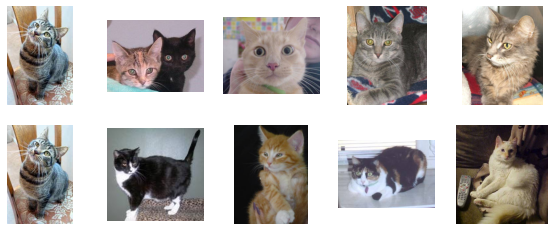

In [3]:
import matplotlib.pyplot as plt
import random as rnd

ten_rand_image = []
for i in range(10):
    r = rnd.randint(1,500)
    ten_rand_image.append(plt.imread(f"./originaldata/train/train/cat.{r}.jpg"))


fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(ten_rand_image[i], cmap = "gray")
    ax.axis("off")


## 0d) Train / Val / Test / Split

In [4]:
import shutil

r = rnd.sample(range(12499), 1250) # This random-list is created without duplicates, so no duplicates of pictures.
train_path = r"./experiment_small_data/train"
test_path = r"./experiment_small_data/test"
val_path = r"./experiment_small_data/val"
for i in range(1250):
        train_cat = f"./originaldata/train/train/cat.{r[i]}.jpg"
        train_dog = f"./originaldata/train/train/dog.{r[i]}.jpg"
        if i <= 800:
                end_path = train_path
        elif i <= 1000:
                end_path = val_path
        else:
                end_path = test_path
        shutil.copy(train_cat, end_path)
        shutil.copy(train_dog, end_path)

## 0e) One-hot-encoding

In [5]:
import numpy as np
temporary_train = np.array(os.listdir("./experiment_small_data/train"))
temporary_test = np.array(os.listdir("./experiment_small_data/test"))
temporary_val = np.array(os.listdir("./experiment_small_data/val"))
X_train = []
y_train = []
X_train_val = []
y_train_val = []
X_test = []
y_test = []


rnd.shuffle(temporary_train)
rnd.shuffle(temporary_val)
for i,_ in enumerate(temporary_val):
    if temporary_val[i][0:3] == "dog":
        animal = 1
    elif temporary_val[i][0:3] == "cat":
        animal = 0
    X_train_val.append(plt.imread(f"./experiment_small_data/val/{temporary_val[i]}"))
    y_train_val.append(animal)

for i,_ in enumerate(temporary_train):
    if temporary_train[i][0:3] == "dog":
        animal = 1
    elif temporary_train[i][0:3] == "cat":
        animal = 0
    X_train.append(plt.imread(f"./experiment_small_data/train/{temporary_train[i]}"))
    y_train.append(animal)

for i,_ in enumerate(temporary_test):
    if temporary_train[i][0:3] == "dog":
        animal = 1
    elif temporary_train[i][0:3] == "cat":
        animal = 0
    X_test.append(plt.imread(f"./experiment_small_data/test/{temporary_test[i]}"))
    y_test.append(animal)


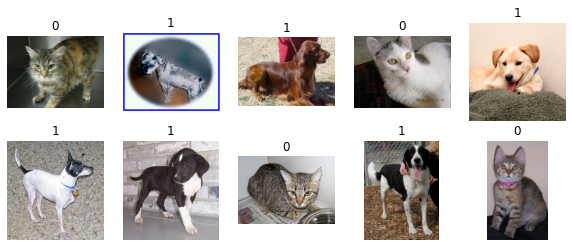

In [6]:
# plotting
fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i], cmap = "gray")
    ax.axis("off")
    ax.set(title=y_train[i])


([<matplotlib.patches.Wedge at 0x1b3a1e21c40>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')])

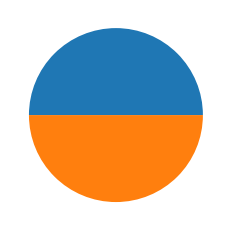

In [7]:
plt.pie([y_train.count(0),y_train.count(1)])

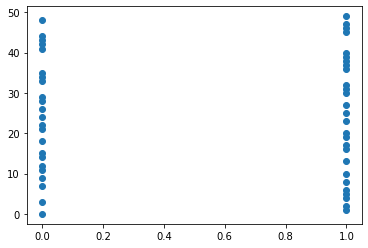

In [8]:
# plotting that they are not in a specific order, just random.
plot_list = []
x=0
for i in range(50):
    plot_list.append(x)
    x+=1
plt.scatter(x = y_train[0:50], y = plot_list)

## 1a) Plot image sizes.

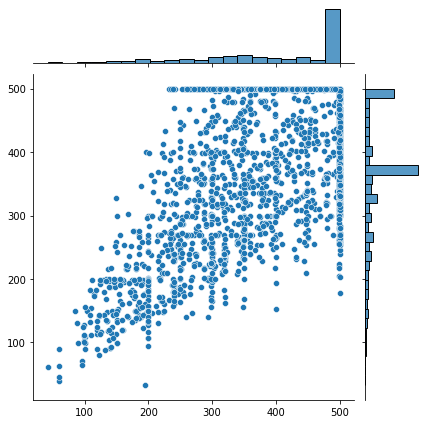

In [9]:
import seaborn as sns
import PIL

directory = './experiment_small_data/train/'
joint_x = []
joint_y = []

# code taken from https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
# but rewritten
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        image = PIL.Image.open(f)
        width, height = image.size
        joint_x.append(width)
        joint_y.append(height)

sns.jointplot(x = joint_x, y = joint_y)

## 1b) Resized pictures

- I used 224,224 since this was one of the most commonly used sizes. Not to small to remove a lot of pixels but not too big to be too heavy for the model.

In [10]:
#resize = (224,224)
resize = (100,100)
# resizing the pictures into  a new list.
import cv2
resized_X_train = []
resized_X_val = []
resized_X_test = []
for i in range(len(X_train)):
    resized_X_train.append(cv2.resize(X_train[i], resize))
for i in range(len(X_train_val)):
    resized_X_val.append(cv2.resize(X_train_val[i], resize))
for i in range(len(X_test)):
    resized_X_test.append(cv2.resize(X_test[i], resize))

## 1c) Save the resized images into a new np array.

In [11]:
structured_resized_X_train = np.array(resized_X_train)
structured_resized_X_val = np.array(resized_X_val)
structured_resized_X_test = np.array(resized_X_test)

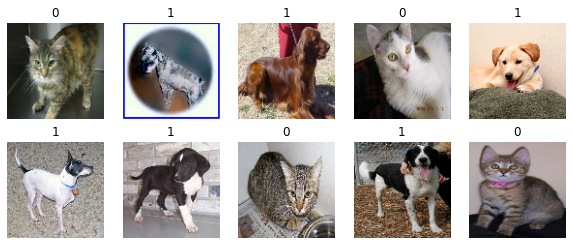

In [12]:
# plotting
fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(structured_resized_X_train[i])
    ax.axis("off")
    ax.set(title=y_train[i])

## 1d) Data augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

structured_resized_X_train = structured_resized_X_train.astype("float32")/255
structured_resized_X_val = structured_resized_X_val.astype("float32")/255
structured_resized_X_test = structured_resized_X_test.astype("float32")/255
y_train = np.array(y_train)
y_train_val = np.array(y_train_val)
y_test = np.array(y_test)


train_image_generator = ImageDataGenerator(
    rotation_range = 15, 
    shear_range = .3,
    zoom_range = .2,
    horizontal_flip = False,
    height_shift_range = .2,
    width_shift_range = .2,
)

#don't augment validation and test data
test_image_generator = ImageDataGenerator()
train_X_generatior = test_image_generator.flow(structured_resized_X_test, y_test, batch_size=32)
train_X_generatior = test_image_generator.flow(structured_resized_X_train, y_train, batch_size=32)
train_val_generator = test_image_generator.flow(structured_resized_X_val, y_train_val, batch_size=32)
train_generator = train_image_generator.flow(
    structured_resized_X_train, y_train, batch_size = 800)


2
(32, 100, 100, 3)


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

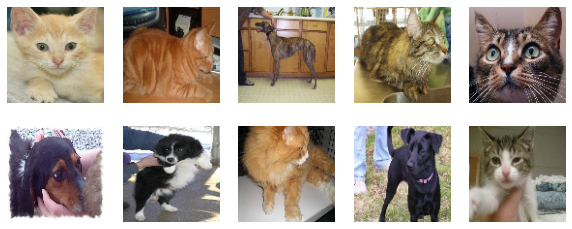

In [14]:
print(len(train_val_generator.next()))

sample_batch = train_val_generator.next()
print(sample_batch[0].shape) # 32 samples in a batch

def plot_samples(data):
    fig, axes = plt.subplots(2,5, figsize = (10,4))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap = "gray")
        ax.axis("off")
        
plot_samples(sample_batch[0])
sample_batch[1]

(32, 100, 100, 3)
(3106, 100, 100, 3)
(790, 100, 100, 3)


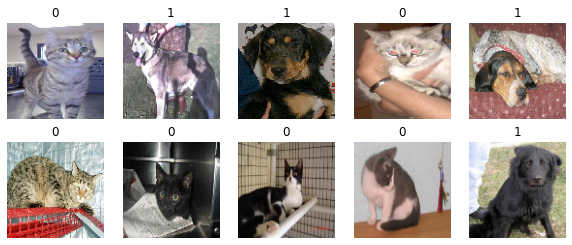

In [15]:
#test12 = structured_resized_X_train
#structured_resized_X_train.append(sample_batch[0])
print(sample_batch[0].shape)
print(structured_resized_X_train.shape)
print(structured_resized_X_val.shape)

# plotting
fig, axes = plt.subplots(2,5, figsize = (10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(train_val_generator[0][0][i], cmap = "gray")
    ax.axis("off")
    ax.set(title=train_val_generator[0][1][i])

## 2a) Train models with hyperparameter tuning.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam

def CNN_model(learning_rate = .001, drop_rate = .5, kernels = [32,64,128,128]):
    adam = Adam(learning_rate = learning_rate)

    model = Sequential(name = "CNN_model")

    for number_kernel in kernels:
        conv_layer = Conv2D(number_kernel, kernel_size = (3,3), 
            activation = "relu", kernel_initializer = "he_normal", 
            input_shape = structured_resized_X_train.shape[1:])
        
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

    #MLP layers
    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ["acc"])

    return model

model = CNN_model()
model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0 

In [17]:
steps_per_epochs = int(len(structured_resized_X_train)/32)
validation_steps = len(X_train_val)/32
validation_steps

24.6875

In [18]:
#from tensorflow.keras.callbacks import EarlyStopping

#early_stopper = EarlyStopping(monitor = "val_acc", mode ="max", patience = 5, restore_best_weights = True)

#model.fit(
    #train_X_generatior,
    #steps_per_epoch = steps_per_epochs,
    #epochs = 100,
    #callbacks = [early_stopper],
   # validation_data = train_val_generator,
    #validation_steps=12
#)

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping

#data_aug = test_image_generator.flow(
#np.concatenate([structured_resized_X_val, structured_resized_X_train]),
#np.concatenate([y_train_val, y_train]), batch_size=32)
#model_augment = CNN_model()
#model_augment.fit(
    #train_X_generatior,
    #steps_per_epoch = steps_per_epochs,
    #epochs = 100,
    #callbacks = [early_stopper],
   # validation_data = train_val_generator,
    #validation_steps=12
#)

In [19]:
import pandas as panda
#metrics = panda.DataFrame(model.history.history)
#metrics.head()

In [20]:
#def plot_metrics(metrics):
  #  _, ax = plt.subplots(1,2, figsize = (12,4))
   # metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
   # metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

#plot_metrics(metrics)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
learning_rate_param = [0.001,0.005]
drop_rates_param = [0.5, 0.001, 0.0001]
ln001 = []
ln005 = []

early_stopper = EarlyStopping(monitor = "val_acc", mode ="max", patience = 5, restore_best_weights = True)

for a in range(len(learning_rate_param)):
    for b in range(len(drop_rates_param)):
        print(f"Drop rate: {drop_rates_param[b]}, Learning rate: {learning_rate_param[a]}")
        model2 = CNN_model(learning_rate=learning_rate_param[a], drop_rate = drop_rates_param[b])
        model2.fit(
            train_X_generatior,
            steps_per_epoch = steps_per_epochs,
            epochs = 25,
            callbacks = [early_stopper],
            validation_data = train_val_generator,
            validation_steps=12
        )
        if a == 0:
            ln001.append(model2.history.history["val_acc"])
        elif a == 1:
            ln005.append(model2.history.history["val_acc"])
        


Drop rate: 0.5, Learning rate: 0.001
Epoch 1/25
97/97 [==============================] - 22s 220ms/step - loss: 0.7572 - acc: 0.5055 - val_loss: 0.6940 - val_acc: 0.5052
Epoch 2/25
97/97 [==============================] - 21s 212ms/step - loss: 0.6913 - acc: 0.5231 - val_loss: 0.6855 - val_acc: 0.5234
Epoch 3/25
97/97 [==============================] - 21s 213ms/step - loss: 0.6733 - acc: 0.5862 - val_loss: 0.6638 - val_acc: 0.5885
Epoch 4/25
97/97 [==============================] - 21s 221ms/step - loss: 0.6586 - acc: 0.6113 - val_loss: 0.6448 - val_acc: 0.6458
Epoch 5/25
97/97 [==============================] - 21s 217ms/step - loss: 0.6456 - acc: 0.6220 - val_loss: 0.6035 - val_acc: 0.6901
Epoch 6/25
97/97 [==============================] - 20s 204ms/step - loss: 0.6220 - acc: 0.6555 - val_loss: 0.6224 - val_acc: 0.6302
Epoch 7/25
97/97 [==============================] - 20s 204ms/step - loss: 0.5957 - acc: 0.6838 - val_loss: 0.5762 - val_acc: 0.6927
Epoch 8/25
97/97 [==============

In [22]:
ln001 = panda.DataFrame(ln001).transpose()
ln005 = panda.DataFrame(ln005).transpose()

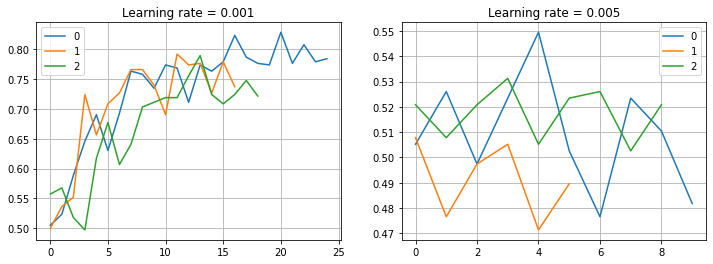

In [23]:
def plot_metrics():
    _, ax = plt.subplots(1,2, figsize = (12,4))
    ln001.plot(ax = ax[0], title = "Learning rate = 0.001", grid = True)
    ln005.plot(ax = ax[1], title = "Learning rate = 0.005", grid = True)

plot_metrics()

In [24]:
# Testing another model with only two layers, based on article reccomending to start with 1 or 2 layers only.
model3 = CNN_model(kernels=[256,128])
model3.fit(
            train_X_generatior,
            steps_per_epoch = steps_per_epochs,
            epochs = 25,
            callbacks = [early_stopper],
            validation_data = train_val_generator,
            validation_steps=12
        )

Epoch 1/25
97/97 [==============================] - 146s 1s/step - loss: 2.2782 - acc: 0.5397 - val_loss: 0.6920 - val_acc: 0.5130
Epoch 2/25
97/97 [==============================] - 148s 2s/step - loss: 0.6669 - acc: 0.6067 - val_loss: 0.6094 - val_acc: 0.6797
Epoch 3/25
97/97 [==============================] - 125s 1s/step - loss: 0.6275 - acc: 0.6607 - val_loss: 0.6121 - val_acc: 0.7057
Epoch 4/25
97/97 [==============================] - 134s 1s/step - loss: 0.5802 - acc: 0.6867 - val_loss: 0.6388 - val_acc: 0.6484
Epoch 5/25
97/97 [==============================] - 130s 1s/step - loss: 0.5408 - acc: 0.7199 - val_loss: 0.6219 - val_acc: 0.6771
Epoch 6/25
97/97 [==============================] - 117s 1s/step - loss: 0.4995 - acc: 0.7427 - val_loss: 0.6815 - val_acc: 0.6328
Epoch 7/25
97/97 [==============================] - 118s 1s/step - loss: 0.4470 - acc: 0.7830 - val_loss: 0.5689 - val_acc: 0.7344
Epoch 8/25
97/97 [==============================] - 124s 1s/step - loss: 0.3671 - a

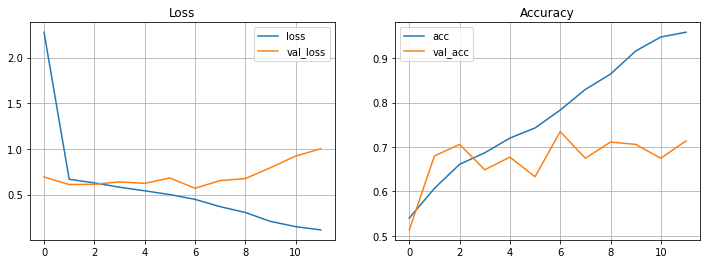

In [25]:
metrics = panda.DataFrame(model3.history.history)
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)

In [26]:
model4 = CNN_model(kernels=[64,32,16,16], learning_rate= 0.001, drop_rate= 0.7)
early_stopper = EarlyStopping(monitor = "val_acc", mode ="max", patience = 10, restore_best_weights = True)
model4.fit(
            train_X_generatior,
            steps_per_epoch = steps_per_epochs,
            epochs = 50,
            callbacks = [early_stopper],
            validation_data = train_val_generator,
            validation_steps=12
        )

Epoch 1/50
97/97 [==============================] - 20s 198ms/step - loss: 0.6985 - acc: 0.5202 - val_loss: 0.6916 - val_acc: 0.5182
Epoch 2/50
97/97 [==============================] - 19s 192ms/step - loss: 0.6900 - acc: 0.5407 - val_loss: 0.6756 - val_acc: 0.6146
Epoch 3/50
97/97 [==============================] - 19s 192ms/step - loss: 0.6768 - acc: 0.5794 - val_loss: 0.6680 - val_acc: 0.5911
Epoch 4/50
97/97 [==============================] - 19s 193ms/step - loss: 0.6641 - acc: 0.5989 - val_loss: 0.6895 - val_acc: 0.5625
Epoch 5/50
97/97 [==============================] - 19s 192ms/step - loss: 0.6604 - acc: 0.6061 - val_loss: 0.6302 - val_acc: 0.6536
Epoch 6/50
97/97 [==============================] - 19s 193ms/step - loss: 0.6437 - acc: 0.6278 - val_loss: 0.6163 - val_acc: 0.6745
Epoch 7/50
97/97 [==============================] - 19s 193ms/step - loss: 0.6388 - acc: 0.6376 - val_loss: 0.6193 - val_acc: 0.6719
Epoch 8/50
97/97 [==============================] - 20s 209ms/step - 

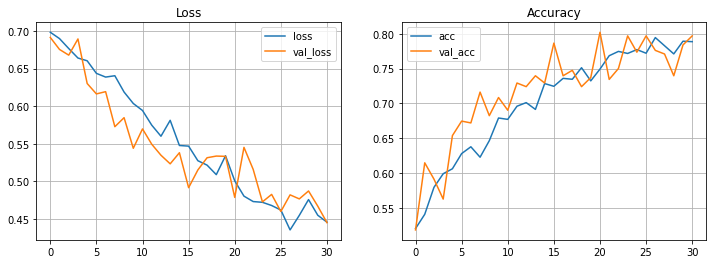

In [27]:
metrics = panda.DataFrame(model4.history.history)
plot_metrics(metrics)

## Choosing a model and train it on train and val data

In [28]:
ChoosenModel = CNN_model(learning_rate= 0.001, drop_rate= 0.7)

valandtrain_generation = test_image_generator.flow(
np.concatenate([structured_resized_X_val, structured_resized_X_train]),
np.concatenate([y_train_val, y_train]), batch_size=32)

early_stopper = EarlyStopping(monitor = "val_acc", mode ="max", patience = 10, restore_best_weights = True)
ChoosenModel.fit(
            train_X_generatior,
            steps_per_epoch = steps_per_epochs,
            epochs = 50,
            callbacks = [early_stopper],
            validation_data = train_val_generator,
            validation_steps=12
        )

Epoch 1/50
97/97 [==============================] - 17s 174ms/step - loss: 0.7515 - acc: 0.5072 - val_loss: 0.6863 - val_acc: 0.5182
Epoch 2/50
97/97 [==============================] - 17s 173ms/step - loss: 0.6859 - acc: 0.5478 - val_loss: 0.6813 - val_acc: 0.5547
Epoch 3/50
97/97 [==============================] - 21s 213ms/step - loss: 0.6824 - acc: 0.5605 - val_loss: 0.6608 - val_acc: 0.6094
Epoch 4/50
97/97 [==============================] - 19s 201ms/step - loss: 0.6737 - acc: 0.5791 - val_loss: 0.6551 - val_acc: 0.6094
Epoch 5/50
97/97 [==============================] - 20s 203ms/step - loss: 0.6534 - acc: 0.6041 - val_loss: 0.6138 - val_acc: 0.6641
Epoch 6/50
97/97 [==============================] - 20s 201ms/step - loss: 0.6356 - acc: 0.6422 - val_loss: 0.6229 - val_acc: 0.6120
Epoch 7/50
97/97 [==============================] - 19s 200ms/step - loss: 0.6169 - acc: 0.6513 - val_loss: 0.6070 - val_acc: 0.6797
Epoch 8/50
97/97 [==============================] - 19s 201ms/step - 

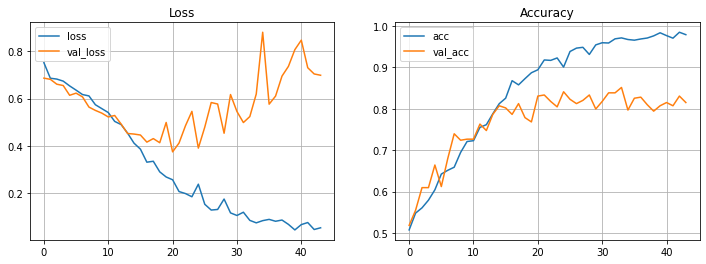

In [29]:
metrics = panda.DataFrame(ChoosenModel.history.history)
plot_metrics(metrics)

## Transfer Learning - Xception

In [30]:
from tensorflow.keras.applications import Xception
input_shape = 120, 120, 3
feature_extractor = Xception(weights = "imagenet", include_top = False, input_shape = (input_shape))
feature_extractor.summary()

83697664/83683744 [==============================] - 7s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 59, 59, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 59, 59, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                          

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

model = Sequential(
    [
        feature_extractor,
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(256, activation="relu", kernel_initializer="he_normal"),
        Dropout(0.5),
        Dense(5, activation="sigmoid"),
    ]
)

for layer in feature_extractor.layers:
    layer.trainable = False
    
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_14 (Dropout)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 256)               524544    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 5)                 1285      
                                                      

In [39]:
model.fit(train_X_generatior, epochs = 20, validation_data = train_val_generator)

Epoch 1/20
98/98 [==============================] - 43s 427ms/step - loss: 0.4876 - acc: 0.8236 - val_loss: 0.3050 - val_acc: 0.8582
Epoch 2/20
98/98 [==============================] - 42s 427ms/step - loss: 0.2856 - acc: 0.8677 - val_loss: 0.2395 - val_acc: 0.9013
Epoch 3/20
98/98 [==============================] - 42s 425ms/step - loss: 0.2507 - acc: 0.8902 - val_loss: 0.2458 - val_acc: 0.8886
Epoch 4/20
98/98 [==============================] - 43s 439ms/step - loss: 0.2347 - acc: 0.8986 - val_loss: 0.2292 - val_acc: 0.8949
Epoch 5/20
98/98 [==============================] - 43s 439ms/step - loss: 0.2270 - acc: 0.8986 - val_loss: 0.2159 - val_acc: 0.9063
Epoch 6/20
10/98 [==>...........................] - ETA: 34s - loss: 0.2165 - acc: 0.9062

KeyboardInterrupt: 

<AxesSubplot:>

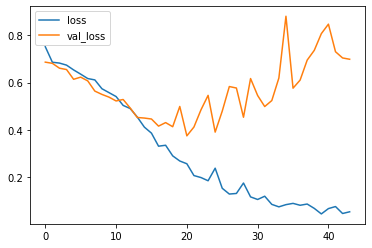

In [34]:
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

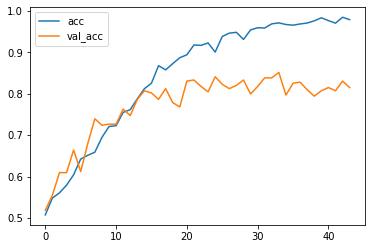

In [35]:
metrics[["acc", "val_acc"]].plot()

## Summary Xception & Transfer Learning

#### Xception article summary

Text blablabal


#### Description Transfer Learning